In [162]:
import pandas as pd

# <u> (1) LODING DATA TO PANDAS DATAFRAME </u>

### (i)Geograhical Data (Description) 
=>Geographical data description is a dataset outlining the columns content and types of data that. they hold<br>
NB: Naming convention for the frame is `geo_desc`

In [163]:
#Reading table description of geographical data
geo_desc = pd.read_excel('./Datasets/cells_geo_description.xlsx')
geo_desc

,Column name,Description,Format
0,VILLES,City,String
1,STATUS,In Service or not,String
2,LOCALISATION,in ABIDJAN or not,String
3,DECOUPZONE,Geographical Zone,String
4,ZONENAME,Name of Zone,String
5,LONGITUDE,Longitude,Float
6,LATITUDE,Latitude,Float
7,REGION,Region,String
8,AREA,Area,String
9,CELL_ID,ID of the cell,String


### (ii)Geograhical Data
=> Geographical details of the study area.<br>
NB: Naming convention for the frame is `geo`

In [164]:
# Engineer the csv to a readable form
data_holder = []

with open('./Datasets/cells_geo.csv', 'r') as f:
    whole_file_read = f.read().split("\n")
    for line in whole_file_read:
        split_line = line.split(';')
        updated_version = split_line[1:]
        data_holder.append(updated_version)
        
columns = data_holder[0]
data = data_holder[1:]

#now make our dataframe
geo = pd.DataFrame(data, columns=columns)
geo.name = 'geo'
geo.head(2)

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""""""Abidjan_EST""",AGBANNEW,-4.00066666666667,5.36819444444444,LAGUNE,,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""""""Abidjan_EST""",AGBANNEW,-4.00066666666667,5.36819444444444,LAGUNE,,1502501d78,0bb492ef17


### (iii) CDR Description
=>Table describing the structure of our daily data tables.<br>
NB: Naming convetion used for the frame is `day_desc`

In [165]:
day_desc = pd.read_excel('./Datasets/CDR_description.xlsx')
day_desc

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


### (iv) Day_1 Data
=>Day one products data<br>
NB:Naming convetion used for the frame is `day1`

In [166]:
day1 = pd.read_csv('./Datasets/Telcom_dataset1.csv')
day1.name = 'day1'
day1.head(2)

,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41


### (iv) Day_2 Data
=>Day two products data<br>
NB:Naming convetion used for the frame is `day2`

In [167]:
day2 = pd.read_csv('./Datasets/Telcom_dataset2.csv')
day2.name = 'day2'
day2.head(2)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2


### (iv) Day_3 Data
=>Day three products data<br>
NB:Naming convetion used for the frame is day3

In [168]:
day3 = pd.read_csv('./Datasets/Telcom_dataset3.csv')
day3.name = 'day3'
day3.head(2)

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx


## <u> (2) CLEANING DATA </u>

In [169]:
#droping columns and rows that have no value totally

frames_list = [geo, day1, day2, day3]
for frame in frames_list:
    shape_before = frame.shape
    frame.dropna(axis=1, how='all')
    frame.dropna(axis=0, how='all')
    shape_after = frame.shape
    if shape_before == shape_after:
        print(f"=>nothing droped from {frame.name}")
    else:
        print(f"=>{frame.name} changed shape")


=>nothing droped from geo
=>nothing droped from day1
=>nothing droped from day2
=>nothing droped from day3


In [170]:
geo.drop_duplicates()
day1.drop_duplicates()
day2.drop_duplicates()
day3.drop_duplicates()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
...,...,...,...,...,...,...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43.0,0,2f834987f0c1825,accc8e5c1164343,19e2e,OTHER,6467daa1db,8a96bae9c1
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


In [171]:
#dropning irrelevant columns in geo data
geo.drop(columns=['LOCALISATION', 'DECOUPZONE', 'ZONENAME', 'LONGITUDE', 'LATITUDE', 'CELL_ID', 'AREA'], axis=1, inplace=True)

In [172]:
#dropping irrelevant columns in geo data
day1.drop(columns=['CELL_ON_SITE', 'DW_A_NUMBER_INT','DW_B_NUMBER_INT', 'COUNTRY_A', 'COUNTRY_B', 'CELL_ID'], axis=1, inplace=True)
day2.drop(columns=['CELL_ON_SITE', 'DW_A_NUMBER','DW_B_NUMBER', 'COUNTRY_A', 'COUNTRY_B', 'CELL_ID'], axis=1, inplace=True)
day3.drop(columns=['CELL_ON_SITE', 'DW_A_NUMBER_INT','DW_B_NUMBER_INT', 'COUNTRY_A', 'COUNTRY_B', 'CELLID'], axis=1, inplace=True)

In [173]:
#renaming columns for geo data
geo.columns = ['city', 'status', 'region', 'site_id']

In [174]:
#renaming the columns in the daily datasets
day1.columns = ['product', 'value', 'day', 'site_id']
day2.columns = ['product', 'value', 'day', 'site_id']
day3.columns = ['product', 'value', 'day', 'site_id']

## <u> (3) MERGING DATASETS </u>

In [175]:
#join the daily datasets
product = pd.concat([day1, day2, day3], axis=0)
product.head(3)

,product,value,day,site_id
0,Voice,0,2012-05-06 23:04:37.0,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,/u0FSD+ahi


In [176]:
#merge the product and geo data
product = product.merge(geo, how='inner', on='site_id')

#remove duplicates
product = product.drop_duplicates()

## <u> (4) ANALYSIS </u>

In [177]:
# most used city in the 3 days in terms of revenue generated
most_revenue = product['value'].groupby(product['city']).sum()
most_revenue

city
ABENGOUROU        2035
ABOBO            23426
ABOISSO            275
ABOISSO COMOE      265
ABONGOUA             1
                 ...  
ZATTA                1
ZIKISSO            242
ZON-HOUNIEN        121
ZOUKOUGBEU         238
ZUENOULA          1282
Name: value, Length: 400, dtype: int64

In [178]:
#most profitable city in sms usage
sms_revenue = product[product['product'] == 'sms']
sms_revenue = sms_revenue['value'].groupby(sms_revenue['city']).sum()
sms_revenue.sort_values(ascending=False, inplace=True)
sms_revenue.head(20)

city
YOPOUGON        9888
ABOBO           5534
COCODY          3975
KOUMASSI        3125
ADJAME          2674
MARCORY         2188
PORT-BOUET      1676
DALOA           1535
TREICHVILLE     1400
YAMOUSSOUKRO    1325
DIVO            1300
BOUAKE          1102
ATTECOUBE        975
GAGNOA           875
SAN-PEDRO        801
BINGERVILLE      500
BONDOUKOU        375
FERKE            350
KORHOGO          325
ABENGOUROU       325
Name: value, dtype: int64

In [179]:
#most profitable cities in Voice usage
voice_revenue = product[product['product'] == 'Voice']
voice_revenue = voice_revenue['value'].groupby(voice_revenue['city']).sum()
voice_revenue.sort_values(ascending=False, inplace=True)
voice_revenue.head(20)

city
COCODY          32726
YOPOUGON        32192
ABOBO           17892
TREICHVILLE     11748
KOUMASSI        11472
ADJAME          10723
MARCORY          9522
SAN-PEDRO        6667
YAMOUSSOUKRO     6578
BOUAKE           6259
PORT-BOUET       5914
DALOA            4921
GAGNOA           3736
DIVO             3580
DAOUKRO          3259
MAN              2969
ATTECOUBE        2800
ODIENNE          2708
ASSINIE          2535
SIPILOU          2429
Name: value, dtype: int64

In [180]:
#most profitable regions in Voice usage
data_revenue = product[product['product'] == 'data']
data_revenue = data_revenue['value'].groupby(data_revenue['region']).sum()
data_revenue.sort_values(ascending=False, inplace=True)
data_revenue.head(20)

Series([], Name: value, dtype: int64)

In [181]:
city_usage_frames = pd.concat([sms_revenue, voice_revenue, data_revenue, most_revenue], axis=1)
city_usage_frames.columns = ['sms_revenue', 'voice_revenue', 'data_revenue', 'total_revenue']
city_usage_frames

,sms_revenue,voice_revenue,data_revenue,total_revenue
YOPOUGON,9888.0,32192.0,NaN,42080
ABOBO,5534.0,17892.0,NaN,23426
COCODY,3975.0,32726.0,NaN,36701
KOUMASSI,3125.0,11472.0,NaN,14597
ADJAME,2674.0,10723.0,NaN,13397
...,...,...,...,...
AGONDA,NaN,0.0,NaN,0
PONANGUIGLO,NaN,0.0,NaN,0
DJENIDOUFLA,NaN,0.0,NaN,0
DIEOUZON,NaN,0.0,NaN,0


In [182]:
#sorting the cities with revenue generated and printing the first 50
city_usage_frames.fillna(0, inplace=True)
final = city_usage_frames.sort_values('total_revenue', ascending=False)
final.head(50)

,sms_revenue,voice_revenue,data_revenue,total_revenue
YOPOUGON,9888.0,32192.0,0.0,42080
COCODY,3975.0,32726.0,0.0,36701
ABOBO,5534.0,17892.0,0.0,23426
KOUMASSI,3125.0,11472.0,0.0,14597
ADJAME,2674.0,10723.0,0.0,13397
TREICHVILLE,1400.0,11748.0,0.0,13148
MARCORY,2188.0,9522.0,0.0,11710
YAMOUSSOUKRO,1325.0,6578.0,0.0,7903
PORT-BOUET,1676.0,5914.0,0.0,7590
SAN-PEDRO,801.0,6667.0,0.0,7468


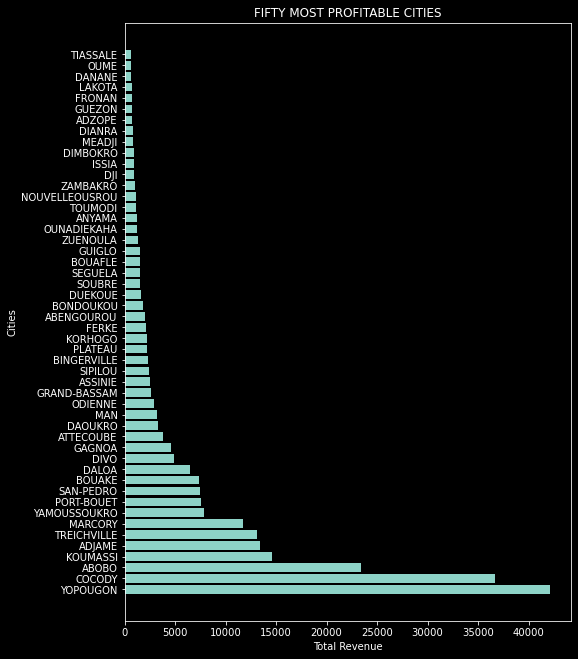

In [183]:
#plotting the first 50 cities with their revenue generated
import matplotlib.pyplot as plt
import numpy as np

count = 0
cities = []
for city in final.index:
    if count == 50:
        break
    else:
        cities.append(city)
        count += 1

y = list(final['total_revenue'][:50])

plt.figure(figsize=(8,11)) 
#plt.style.use('')
plt.barh(cities, y)

plt.title('FIFTY MOST PROFITABLE CITIES')
plt.xlabel('Total Revenue')
plt.ylabel('Cities')
plt.show()

In [187]:
count = 0
for c in cities:
    print(c, y[count])
    count += 1

YOPOUGON 42080
COCODY 36701
ABOBO 23426
KOUMASSI 14597
ADJAME 13397
TREICHVILLE 13148
MARCORY 11710
YAMOUSSOUKRO 7903
PORT-BOUET 7590
SAN-PEDRO 7468
BOUAKE 7361
DALOA 6456
DIVO 4880
GAGNOA 4611
ATTECOUBE 3775
DAOUKRO 3309
MAN 3253
ODIENNE 2958
GRAND-BASSAM 2647
ASSINIE 2560
SIPILOU 2429
BINGERVILLE 2307
PLATEAU 2265
KORHOGO 2181
FERKE 2152
ABENGOUROU 2035
BONDOUKOU 1851
DUEKOUE 1600
SOUBRE 1562
SEGUELA 1553
BOUAFLE 1493
GUIGLO 1480
ZUENOULA 1282
OUNADIEKAHA 1231
ANYAMA 1181
TOUMODI 1143
NOUVELLEOUSROU 1134
ZAMBAKRO 1042
DJI 973
ISSIA 947
DIMBOKRO 945
MEADJI 812
DIANRA 792
ADZOPE 750
GUEZON 739
FRONAN 718
LAKOTA 711
DANANE 682
OUME 669
TIASSALE 661
